# Aluno

Nome: Rodrigo Edmar Wright Dos Santos
</br> Matrícula: 200027158

# Objetivo

O objetivo deste artigo é ver se uma I.A. consegue identificar padrões no mercado de bitcoins.

# Motivação

O mercado de bitcoins é muito conhecido por ser imprevisível e difícil de lidar. Então surgiu a ideia de criar uma inteligência artifícial para calcular o mercado, para ver se a máquina é capaz de encontrar padrões que não são perceptíveis para o ser humano.

Para isso, utilizaremos o dataset disponível na Kaggle [Bitcoin data](https://www.kaggle.com/datasets/sushilkumarinfo/bitcoin-data-from-9thapr2014-to-30thdec2022?resource=download) que reúne todos os dados relevantes sobre bitcoin desde 2014 até 2022.

# Configurando o ambiente

Primeiramente devemos instalar as dependencias que serão usadas:

In [23]:
!pip install -Uqq fastai
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [24]:
from torch import tensor

In [53]:
from fastai.data.transforms import RandomSplitter

In [65]:
import sympy

ModuleNotFoundError: No module named 'sympy'

Também é importante definir a pasta onde serão armazenados os dados.

In [25]:
from pathlib import Path
path = Path('Bitcoin')

# Limpando os dados

Os dados fornecidos estão no formato CSV (comma separeted values, ou valores separados por vírgula), e podem ser manipulados com a biblioteca préviamente instalada Pandas. Ao abrir usando o Pandas será gerado um Data Frame.

In [26]:
df = pd.read_csv(path/'BTC_Data_final.csv')
df

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
0,2014/04/09,447.11,243742.0,122401,64992,38678.0000,2.392120e+08,139.0000,0.0447,8944.00,5587996110,4115.0,100.42,8193,11193.0,502.00,179274,19211.0
1,2014/04/10,407703.00,254334.0,124298,67872,31917.0000,3.103671e+08,0.0864,0.0408,9.29,5020359905,4876.0,120946.00,15039,13854.0,371.00,182996,19166.0
2,2014/04/11,403328.00,223656.0,117926,65563,36814.0000,2.927563e+08,0.0858,0.0403,8521.00,5068919648,4819.0,108481.00,14907,12997.0,0.33,169622,19141.0
3,2014/04/12,425.31,169964.0,87828,47579,34498.0000,1.572647e+08,0.0811,0.0425,8944.00,5329088351,3574.0,84408.00,7582,9229.0,226.00,132283,19145.0
4,2014/04/13,415876.00,162260.0,94828,50981,34141.0000,1.547564e+08,84.0000,0.0416,7701.00,5150414718,3332.0,69681.00,10674,10385.0,221.00,172708,19131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,2022/12/16,17100.00,660280.0,542123,254046,0.0562,6.612437e+09,1115.0000,462.0000,11077.00,328931567036,75525.0,500.98,108929,19909.0,1999.00,763567,14816.0
3174,2022/12/17,16699.00,703268.0,536035,263062,0.0679,4.970511e+09,1107.0000,471.0000,10435.00,321216328776,49982.0,361097.00,89303,17697.0,1982.00,846989,14752.0
3175,2022/12/18,16736.00,511467.0,439567,212528,65.0000,3.493454e+09,912.0000,377.0000,9931.00,321956223728,55620.0,400564.00,81518,15485.0,1263.00,691511,14731.0
3176,2022/12/19,16679.00,706111.0,484919,258960,0.0569,6.191116e+09,1164.0000,0.4500,10588.00,320876529094,67503.0,447028.00,100038,17697.0,2083.00,804421,14672.0


## Verificação de dados

Para prosseguirmos precisamos saber se existe algum dado inválido, no caso ele estará como NAN (not a number, ou não é um número). Precisamos tratar este tipo de dado agora pois ele não poderá ser manipulado corretamente no futuro e pode gerar problemas.

In [27]:
df.isna().sum()

Date                      0
priceUSD                  0
size                      0
sentbyaddress             0
transactions              0
mining_profitability      0
sentinusd                 0
transactionfees           0
median_transaction_fee    0
confirmationtime          0
marketcap                 0
transactionvalue          0
mediantransactionvalue    0
tweets                    0
google_trends             0
fee_to_reward             0
activeaddresses           0
top100cap                 0
dtype: int64

## Variação de valores

Como podemos perceber acima, não temos valores inválidos no arquivo, portanto podemos prosseguir visualizando os valores numéricos das colunas do dataset.

In [28]:
df.describe(include=(np.number))

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
count,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3.178000e+03,3178.000000,3178.000000,3178.000000,3.178000e+03,3.178000e+03,3178.000000,3178.000000,3178.000000,3178.000000,3.178000e+03,3178.000000
mean,145373.284663,702148.932033,370840.438955,236861.120201,1779.020914,1.192430e+10,2444.509835,1158.803386,7588.281598,2.256854e+11,1.247182e+05,297494.328371,52702.595972,46136.221051,3725.576331,5.768229e+05,15523.147778
std,222752.788559,208389.746506,132981.655738,84305.738636,4850.058803,2.244839e+10,5659.491104,2980.924809,4214.706035,3.027574e+11,2.372011e+05,253608.877403,47215.636517,56568.162740,5220.490585,2.405519e+05,5566.598931
min,210.640000,162260.000000,70902.000000,47579.000000,0.052500,9.471432e+07,0.024100,0.009970,0.000000,2.655832e+09,1.166000e+03,0.091700,0.000000,5.910000,0.240000,0.000000e+00,0.000000
25%,7399.250000,583767.750000,288050.250000,192268.500000,144.000000,9.352113e+08,2.315000,0.086625,8045.000000,9.040019e+09,5.847500e+03,99138.750000,21905.250000,8462.000000,678.250000,4.150890e+05,14754.000000
50%,19722.500000,740894.000000,390110.500000,252011.000000,331.000000,4.368336e+09,669.500000,217.000000,9231.000000,1.134215e+11,2.559650e+04,215612.500000,30182.500000,31516.000000,1426.500000,5.956720e+05,15787.000000
75%,243145.000000,879452.000000,475826.500000,296568.000000,1290.000000,1.153206e+10,2173.750000,776.750000,10213.000000,2.561065e+11,1.001445e+05,483636.500000,74964.000000,57322.000000,4647.500000,7.660078e+05,19122.750000
max,999914.000000,998092.000000,730199.000000,490459.000000,40706.000000,3.833295e+11,62779.000000,34095.000000,24828.000000,1.274513e+12,2.450460e+06,998565.000000,363566.000000,616867.000000,40631.000000,1.196069e+06,21809.000000


Valores monetários tendem a variar muito, como podemos ver na tabela onde o preço varia de 210 usd para 999914 usd:

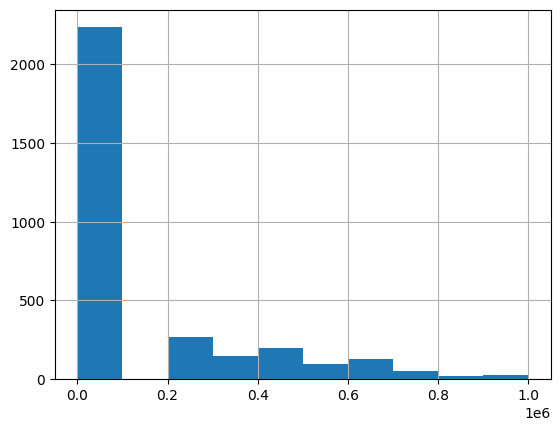

In [29]:
df['priceUSD'].hist();

Essa discrepância no valores dos dados podem afetar o nosso modelo, portanto aplicaremos uma técnica de tirar o logarítimo do número, pois isso fará com que os números muito grandes sejam consideravelmente reduzidos, e os números pequenos se mantenham. No entanto, é importante ressaltar que deve ser somado 1 na equação, pois o logarítmo de 0 é infinito, e isso pode complicar as coisas.

In [30]:
df['logpriceUSD'] = np.log(df['priceUSD']+1)

Agora temos uma nova coluna chamada logpriceUSD que contém os logarítmos da coluna priceUSD, e sua aparência é assim:

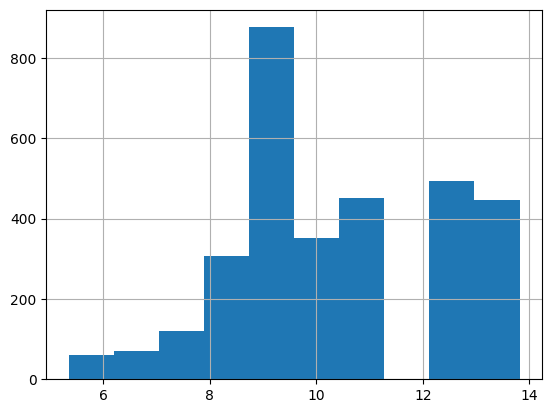

In [31]:
df['logpriceUSD'].hist();

Agora faremos isso para todos os valores com desvio muito grande.

In [32]:
df['logsize'] = np.log(df['size']+1)
df['logtransactions'] = np.log(df['transactions']+1)
df['logmining_profitability'] = np.log(df['mining_profitability']+1) 
df['logtransactionfees'] = np.log(df['transactionfees']+1)
df['logmedian_transaction_fee'] = np.log(df['median_transaction_fee']+1)
df['logmarketcap'] = np.log(df['marketcap']+1)
df['logtransactionvalue'] = np.log(df['transactionvalue']+1)
df['logmediantransactionvalue'] = np.log(df['mediantransactionvalue']+1)
df['logtweets'] = np.log(df['tweets']+1)
df['loggoogle_trends'] = np.log(df['google_trends']+1)
df['logtop100cap'] = np.log(df['top100cap']+1)

## Remoção de dados

Para facilitar, e não complicar muito o modelo, iremos remover algumas colunas que não serão necessárias para este modelo.

In [33]:
df = df.drop(columns=['sentbyaddress','confirmationtime', 'fee_to_reward', 'activeaddresses'])

Agora a tabela está assim:

In [34]:
df

,Date,priceUSD,size,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,marketcap,transactionvalue,...,logtransactions,logmining_profitability,logtransactionfees,logmedian_transaction_fee,logmarketcap,logtransactionvalue,logmediantransactionvalue,logtweets,loggoogle_trends,logtop100cap
0,2014/04/09,447.11,243742.0,64992,38678.0000,2.392120e+08,139.0000,0.0447,5587996110,4115.0,...,11.082035,10.563052,4.941642,0.043730,22.443887,8.322637,4.619270,9.011157,9.323133,9.863290
1,2014/04/10,407703.00,254334.0,67872,31917.0000,3.103671e+08,0.0864,0.0408,5020359905,4876.0,...,11.125394,10.370925,0.082869,0.039990,22.336767,8.492286,11.703108,9.618469,9.536401,9.860945
2,2014/04/11,403328.00,223656.0,65563,36814.0000,2.927563e+08,0.0858,0.0403,5068919648,4819.0,...,11.090782,10.513661,0.082317,0.039509,22.346394,8.480529,11.594340,9.609653,9.472551,9.859640
3,2014/04/12,425.31,169964.0,47579,34498.0000,1.572647e+08,0.0811,0.0425,5329088351,3574.0,...,10.770168,10.448686,0.077979,0.041622,22.396446,8.181720,11.343429,8.933664,9.130214,9.859849
4,2014/04/13,415876.00,162260.0,50981,34141.0000,1.547564e+08,84.0000,0.0416,5150414718,3332.0,...,10.839228,10.438284,4.442651,0.040758,22.362343,8.111628,11.151697,9.275660,9.248214,9.859118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,2022/12/16,17100.00,660280.0,254046,0.0562,6.612437e+09,1115.0000,462.0000,328931567036,75525.0,...,12.445275,0.054678,7.017506,6.137727,26.519116,11.232232,6.218560,11.598461,9.898977,9.603530
3174,2022/12/17,16699.00,703268.0,263062,0.0679,4.970511e+09,1107.0000,471.0000,321216328776,49982.0,...,12.480149,0.065694,7.010312,6.156979,26.495381,10.819438,12.796905,11.399802,9.781207,9.599202
3175,2022/12/18,16736.00,511467.0,212528,65.0000,3.493454e+09,912.0000,377.0000,321956223728,55620.0,...,12.266834,4.189655,6.816736,5.934894,26.497681,10.926316,12.900631,11.308591,9.647692,9.597777
3176,2022/12/19,16679.00,706111.0,258960,0.0569,6.191116e+09,1164.0000,0.4500,320876529094,67503.0,...,12.464433,0.055340,7.060476,0.371564,26.494322,11.119942,13.010379,11.513315,9.781207,9.593764


## Valores não numéricos

Agora, podemos ver as colunas não numéricas existentes na tabela.

In [35]:
df.describe(include=[object])

,Date
count,3178
unique,3178
top,2014/04/09
freq,1


A coluna data não é um valor numérico, porém todos os valores existentes nelas são únicos. Portanto não iremos mexer nisso pois geraria uma quantidade muito grande de colunas desnecessárias.

# Configuração de modelo

Primeiramente devemos definir os valores independentes (valores que serão fornecidos para a previsão) e os valores dependentes (valores a serem previstos).

Variáveis independentes:

In [37]:
indep_cols = ['logsize', 'logtransactions', 'logmining_profitability', 'logtransactionfees', 'logmedian_transaction_fee', 'logmarketcap', 'logtransactionvalue', 'logmediantransactionvalue', 'logtweets', 'loggoogle_trends', 'logtop100cap']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[12.4039, 11.0820, 10.5631,  4.9416,  0.0437, 22.4439,  8.3226,  4.6193,  9.0112,  9.3231,  9.8633],
        [12.4464, 11.1254, 10.3709,  0.0829,  0.0400, 22.3368,  8.4923, 11.7031,  9.6185,  9.5364,  9.8609],
        [12.3179, 11.0908, 10.5137,  0.0823,  0.0395, 22.3464,  8.4805, 11.5943,  9.6097,  9.4726,  9.8596],
        [12.0433, 10.7702, 10.4487,  0.0780,  0.0416, 22.3964,  8.1817, 11.3434,  8.9337,  9.1302,  9.8598],
        [11.9970, 10.8392, 10.4383,  4.4427,  0.0408, 22.3623,  8.1116, 11.1517,  9.2757,  9.2482,  9.8591],
        [12.2833, 11.1566, 10.5447,  0.0932,  0.0436, 22.4510,  8.2918, 11.6549,  9.4930,  9.2831,  9.8599],
        [12.3948, 11.1931,  3.6801,  4.7185,  0.0476, 22.5430,  8.4074, 11.7207,  9.6048,  9.3105,  9.8588],
        ...,
        [13.3927, 12.5292,  0.0582,  6.8855,  5.8861, 26.5633, 11.3932,  6.1722, 11.7271,  9.9202,  2.7644],
        [13.4243, 12.5302,  0.0638,  7.1663,  6.1247, 26.5470, 11.0939, 13.0401, 11.6216,  9.8469,  9.6084],
      

A variável dependente será o preço em usd do bitcoin

In [38]:
t_dep = tensor(df.logpriceUSD)

In [39]:
t_indep.shape

torch.Size([3178, 11])

Portanto temos 3178 fileiras de 11 coluna de dados para definir os dados do preço.

## Ajustando coeficientes

Para definir o coeficiente vamos deixar o computador pegar números aleatórios com base em uma seed prédefinida.

In [40]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103])

O modelo irá pegar esses coeficientes aleatórios gerados, e multiplicá-los pelos valos da matriz independente:

In [41]:
t_indep*coeffs

tensor([[-5.7418,  1.5357,  2.5446, -1.1176, -0.0115, -7.0634,  4.0582,  1.4485,  2.5221, -4.0943,  2.0741],
        [-5.7614,  1.5417,  2.4984, -0.0187, -0.0105, -7.0297,  4.1409,  3.6697,  2.6920, -4.1880,  2.0736],
        [-5.7019,  1.5370,  2.5327, -0.0186, -0.0104, -7.0328,  4.1352,  3.6356,  2.6896, -4.1600,  2.0734],
        [-5.5749,  1.4925,  2.5171, -0.0176, -0.0110, -7.0485,  3.9895,  3.5569,  2.5004, -4.0096,  2.0734],
        [-5.5534,  1.5021,  2.5146, -1.0047, -0.0107, -7.0378,  3.9553,  3.4968,  2.5961, -4.0614,  2.0733],
        [-5.6859,  1.5461,  2.5402, -0.0211, -0.0115, -7.0657,  4.0432,  3.6546,  2.6569, -4.0768,  2.0734],
        [-5.7375,  1.5511,  0.8865, -1.0671, -0.0125, -7.0946,  4.0995,  3.6752,  2.6882, -4.0888,  2.0732],
        ...,
        [-6.1995,  1.7363,  0.0140, -1.5572, -1.5495, -8.3599,  5.5554,  1.9354,  3.2822, -4.3566,  0.5813],
        [-6.2141,  1.7364,  0.0154, -1.6207, -1.6123, -8.3547,  5.4095,  4.0890,  3.2527, -4.3243,  2.0205],
      

Porém os valores que são obtidos serão fortemente afetados pelo valor obtido da primeira coluna, para evitar isso, vamos fazer com que todos os valores das colunas sejam entre 0 e 1. Para fazer isso dividiremos todos os valores da coluna pelo maior valor.

In [42]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

Agora não teremos mais esse problema:

In [43]:
t_indep*coeffs

tensor([[-0.4157,  0.1172,  0.2397, -0.1012, -0.0011, -0.2534,  0.2758,  0.1049,  0.1970, -0.3071,  0.2076],
        [-0.4171,  0.1177,  0.2354, -0.0017, -0.0010, -0.2522,  0.2815,  0.2657,  0.2103, -0.3141,  0.2076],
        [-0.4128,  0.1173,  0.2386, -0.0017, -0.0010, -0.2523,  0.2811,  0.2632,  0.2101, -0.3120,  0.2075],
        [-0.4036,  0.1139,  0.2371, -0.0016, -0.0010, -0.2529,  0.2712,  0.2575,  0.1953, -0.3007,  0.2075],
        [-0.4020,  0.1146,  0.2369, -0.0909, -0.0010, -0.2525,  0.2689,  0.2531,  0.2028, -0.3046,  0.2075],
        [-0.4116,  0.1180,  0.2393, -0.0019, -0.0011, -0.2535,  0.2748,  0.2646,  0.2075, -0.3058,  0.2075],
        [-0.4154,  0.1184,  0.0835, -0.0966, -0.0012, -0.2545,  0.2787,  0.2661,  0.2100, -0.3067,  0.2075],
        ...,
        [-0.4488,  0.1325,  0.0013, -0.1410, -0.1485, -0.2999,  0.3776,  0.1401,  0.2563, -0.3268,  0.0582],
        [-0.4499,  0.1325,  0.0014, -0.1467, -0.1545, -0.2997,  0.3677,  0.2960,  0.2540, -0.3243,  0.2023],
      

Agora é possível fazer previzões do sistema, bastando somar os valores das colunas, porém essas previsões não querem dizer nada, pois os coeficientes que foram usados são aleatórios.

In [44]:
preds = (t_indep*coeffs).sum(axis=1)
preds[:5]

tensor([0.0638, 0.3319, 0.3380, 0.3227, 0.2327])

Também podemos calcular o loss

In [45]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(10.2969, dtype=torch.float64)

Agora que podemos fazer previsões, podemos inserir esse código em uma função para continuar.

In [46]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

## Gradiente de coeficiente

Podemos alterar o coeficiente seguindo os passos abaixo

In [47]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103], requires_grad=True)

In [48]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(10.2969, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [77]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [79]:
coeffs.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0220, -0.0164, -0.0494,  0.0944,  0.0899, -0.0118, -0.0072,  0.0137, -0.0285,  0.0110,  0.0024])

In [81]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(1.7533, dtype=torch.float64)


Como podemos ver, o loss caiu um pouco se comparado com a última vez.

# Treinando o modelo linear

Antes de começar o treinamento, devemos dividir os dados para treinamento e validação. Para isso, utilizaremos o random spliter, para separar os dados de forma aleatória.

In [82]:
trn_split,val_split=RandomSplitter(seed=42)(df)

Podemos definir cada divisão agora:

In [83]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(2543, 635)

Agora podemos definir os comandos de gradientes usados anteriormente em funções:

In [84]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [85]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [86]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

Agora temos as funções necessárias para treinar nosso modelo.

In [87]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

Agora podemos treinar nossso modelo, e em cada interação o loss será exibido. Se tudo tiver correto, esse loss deverá cair a cada iteração.

In [89]:
coeffs = train_model(18, lr=0.2)

10.330; 9.034; 7.737; 6.441; 5.145; 3.862; 2.717; 1.970; 1.824; 1.809; 1.804; 1.799; 1.794; 1.789; 1.784; 1.779; 1.775; 1.770; 

Como podemos ver o loss caiu consideravelmente, porém ele está acima de 1, oque é esquisito.

## Medindo a acurácia

Para o modelo ficar completo, também precisamos calcular a acurácia do modelo. Para isso, primeiramente vamos fazer algumas previsões.

In [100]:
preds = calc_preds(coeffs, val_indep)
preds

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 

In [99]:
results = val_dep.bool()==(preds>9)
results[:16]

tensor([False,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True, False,  True, False,  True])

In [98]:
results.float().mean()

tensor(0.8283)

In [97]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>9)).float().mean()
acc(coeffs)

tensor(0.)

Como podemos ver, o modelo está medindo uma acurácia de 100% em todos valores, oque é altamente improvável. Isso provavelmente é um erro.

# Problemas

Infelizmente, a partir deste ponto é difícl confiar que o modelo está funcionando, como podemos ver nos resultados obtidos, todos os números sairam iguais. Isso aconteceu depois que foi aplicado o comando:
> def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

Esse comando serve para deixar os resultados entre 1 e 0 utilizando a função sigmoid, porém isso fez com que todos os números ficassem iguais a 1, oque estragou completamente o sistema.